<a href="https://colab.research.google.com/github/keshav20004/AI-Pytorch/blob/main/Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Adding 2 numbers

In [ ]:
import  torch
a=torch.tensor(2)
b=torch.tensor(3)
print(a+b)


tensor(5)


In [ ]:
import torch
import matplotlib.pyplot as plt



def plot_results(model, distances, times):
    """
    Plots the actual data points and the model's predicted line for a given dataset.

    Args:
        model: The trained machine learning model to use for predictions.
        distances: The input data points (features) for the model.
        times: The target data points (labels) for the plot.
    """
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient calculation for efficient inference
    with torch.no_grad():
        # Make predictions using the trained model
        predicted_times = model(distances)

    # Create a new figure for the plot
    plt.figure(figsize=(8, 6))

    # Plot the actual data points
    plt.plot(distances.numpy(), times.numpy(), color='orange', marker='o', linestyle='None', label='Actual Delivery Times')

    # Plot the predicted line from the model
    plt.plot(distances.numpy(), predicted_times.numpy(), color='green', marker='None', label='Predicted Line')

    # Set the title of the plot
    plt.title('Actual vs. Predicted Delivery Times')
    # Set the x-axis label
    plt.xlabel('Distance (miles)')
    # Set the y-axis label
    plt.ylabel('Time (minutes)')
    # Display the legend
    plt.legend()
    # Add a grid to the plot
    plt.grid(True)
    # Show the plot
    plt.show()



def plot_nonlinear_comparison(model, new_distances, new_times):
    """
    Compares and plots the predictions of a model against new, non-linear data.

    Args:
        model: The trained model to be evaluated.
        new_distances: The new input data for generating predictions.
        new_times: The actual target values for comparison.
    """
    # Set the model to evaluation mode
    model.eval()

    # Disable gradient computation for inference
    with torch.no_grad():
        # Generate predictions using the model
        predictions = model(new_distances)

    # Create a new figure for the plot
    plt.figure(figsize=(8, 6))

    # Plot the actual data points
    plt.plot(new_distances.numpy(), new_times.numpy(), color='orange', marker='o', linestyle='None', label='Actual Data (Bikes & Cars)')

    # Plot the predictions from the model
    plt.plot(new_distances.numpy(), predictions.numpy(), color='green', marker='None', label='Linear Model Predictions')

    # Set the title of the plot
    plt.title('Linear Model vs. Non-Linear Reality')
    # Set the label for the x-axis
    plt.xlabel('Distance (miles)')
    # Set the label for the y-axis
    plt.ylabel('Time (minutes)')
    # Add a legend to the plot
    plt.legend()
    # Add a grid to the plot for better readability
    plt.grid(True)
    # Display the plot
    plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


torch.manual_seed(42)


In [ ]:
distances=torch.tensor([[1.0],[2.0],[3.0],[4.0]],dtype=torch.float32)
times=torch.tensor([[6.32],[12.42],[18.42],[24.42]],dtype=torch.float32)

In [ ]:
model=nn.Sequential(nn.Linear(1,1))

In [ ]:
loss_function=nn.MSELoss()
optimizer=optim.SGD(model.parameters(),lr=0.01)

In [ ]:
for epoch in range(500):
  optimizer.zero_grad()
  output=model(distances)
  loss=loss_function(output,times)
  loss.backward()
  optimizer.step()
  if(epoch+1)%50==0:
    print(f"Epoch {epoch + 1}: Loss = {loss.item()}")



Epoch 50: Loss = 0.5302343368530273
Epoch 100: Loss = 0.3930625915527344
Epoch 150: Loss = 0.2914290428161621
Epoch 200: Loss = 0.2161249816417694
Epoch 250: Loss = 0.16032923758029938
Epoch 300: Loss = 0.11898824572563171
Epoch 350: Loss = 0.08835715055465698
Epoch 400: Loss = 0.06566162407398224
Epoch 450: Loss = 0.048845283687114716
Epoch 500: Loss = 0.03638577088713646


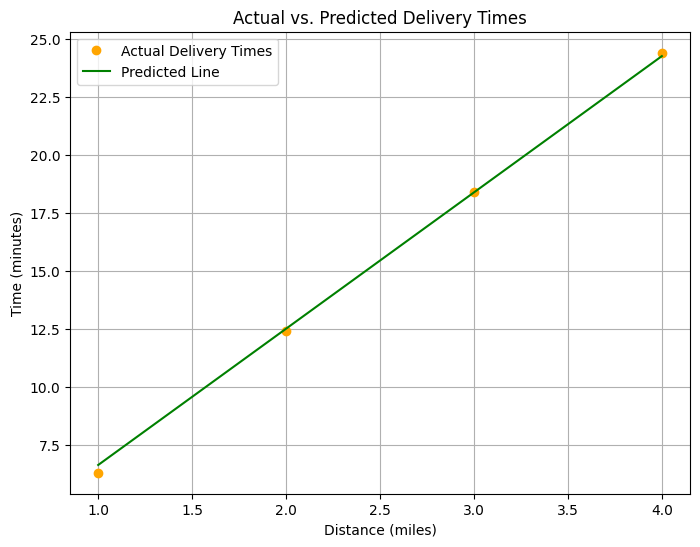

In [ ]:
plot_results(model, distances, times)

In [ ]:
dis_pre=7.0

In [ ]:
with torch.no_grad():
  new_dis=torch.tensor([dis_pre],dtype=torch.float32)
  predicted_times=model(new_dis)
  print(f"Prediction for a {dis_pre}-mile delivery:{predicted_times.item()}")
  if predicted_times.item() > 30:
    print("\nDecision: Do NOT take the job. You will likely be late.")
  else:
    print("\nDecision: Take the job. You can make it!")



Prediction for a 7.0-mile delivery:41.894065856933594

Decision: Do NOT take the job. You will likely be late.


In [ ]:
layers=model[0]

In [ ]:
weigts=layers.weight.data.numpy()


In [ ]:
bias=layers.bias.data.numpy()

In [ ]:
print("Weigts:",weigts)
print("Bias is:",bias)

Weigts: [[5.8733606]]
Bias is: [0.780539]


In [ ]:
# Combined dataset: bikes for short distances, cars for longer ones
new_distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
new_times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

In [ ]:
with torch.no_grad():
  predictions=model(new_distances)
  new_loss=loss_function(predictions,new_times)

In [ ]:
print(f"Loss on new, combined data: {new_loss.item():.2f}")

Loss on new, combined data: 138.02


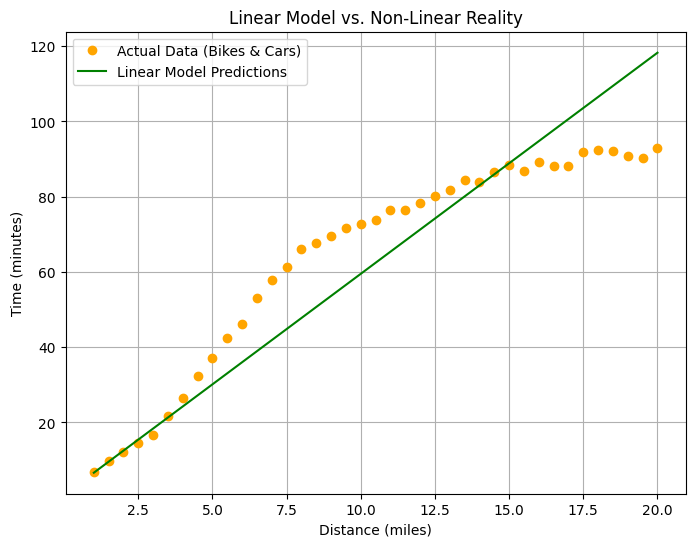

In [ ]:
plot_nonlinear_comparison(model, new_distances, new_times)

Adding activation function ReLu

In [ ]:
# Combined dataset: bikes for short distances, cars for longer ones
distances = torch.tensor([
    [1.0], [1.5], [2.0], [2.5], [3.0], [3.5], [4.0], [4.5], [5.0], [5.5],
    [6.0], [6.5], [7.0], [7.5], [8.0], [8.5], [9.0], [9.5], [10.0], [10.5],
    [11.0], [11.5], [12.0], [12.5], [13.0], [13.5], [14.0], [14.5], [15.0], [15.5],
    [16.0], [16.5], [17.0], [17.5], [18.0], [18.5], [19.0], [19.5], [20.0]
], dtype=torch.float32)

# Corresponding delivery times in minutes
times = torch.tensor([
    [6.96], [9.67], [12.11], [14.56], [16.77], [21.7], [26.52], [32.47], [37.15], [42.35],
    [46.1], [52.98], [57.76], [61.29], [66.15], [67.63], [69.45], [71.57], [72.8], [73.88],
    [76.34], [76.38], [78.34], [80.07], [81.86], [84.45], [83.98], [86.55], [88.33], [86.83],
    [89.24], [88.11], [88.16], [91.77], [92.27], [92.13], [90.73], [90.39], [92.98]
], dtype=torch.float32)

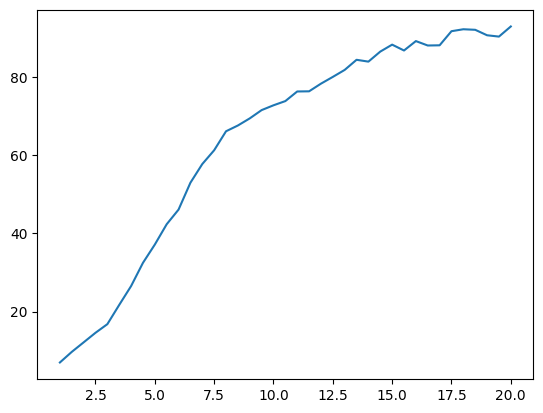

In [ ]:
plt.plot(distances,times)

In [ ]:
dis_mean=distances.mean()
dis_std=distances.std()

In [ ]:
times_mean=times.mean()
times_std=times.std()

In [ ]:
distances_normalized=(distances-dis_mean)/dis_std
times_normalized=(times-times_mean)/times_std

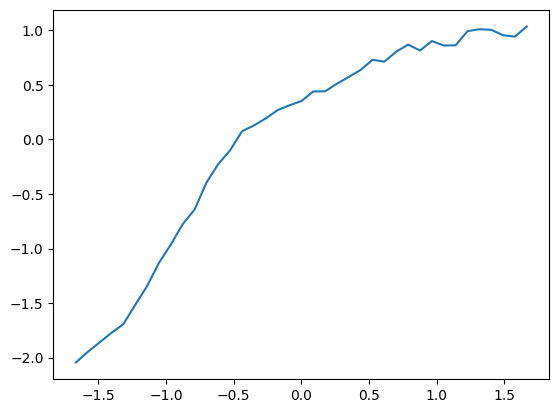

In [ ]:
plt.plot(distances_normalized,times_normalized)

In [ ]:
torch.manual_seed(42)

In [ ]:
model=nn.Sequential(
    nn.Linear(1,3),
    nn.ReLU(),
    nn.Linear(3,1)
)

In [ ]:
loss_function=nn.MSELoss()

In [ ]:
optimizer=optim.SGD(model.parameters(),lr=0.01)

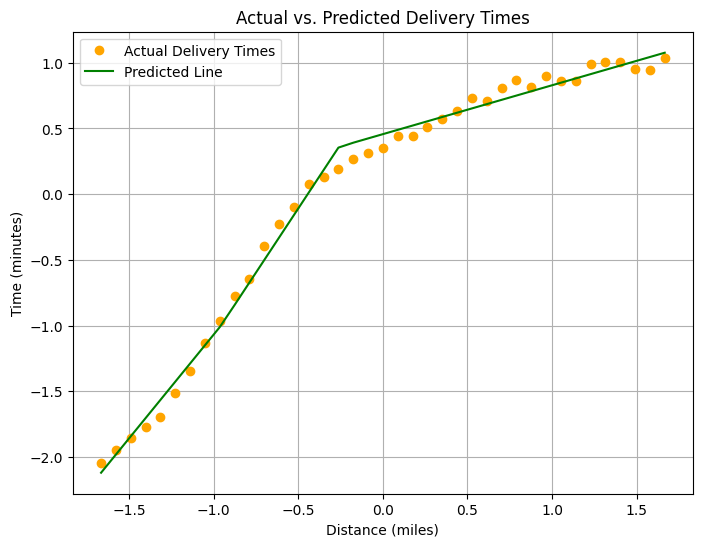

In [ ]:
plot_results(
    model=model,
    distances=distances_normalized,
    times=times_normalized
)


In [ ]:
dis_to_pre=5.1

In [ ]:
with torch.no_grad():
    distance_tensor = torch.tensor([[dis_to_pre]], dtype=torch.float32)

    # normalize input
    new_dis_tensor = (distance_tensor - dis_mean) / dis_std

    # model prediction (normalized)
    pred_time_nor = model(new_dis_tensor)

    # denormalize output
    pred_time = pred_time_nor * times_std + times_mean

    print(f"Prediction for a {dis_to_pre}-mile delivery: {pred_time.item():.1f} minutes")

    if pred_time.item() > 45:
        print("Will not make it there, sorry.")
    else:
        if dis_to_pre <= 3:
            print(
                f"\nDecision: Yes, delivery is possible. "
                f"Since the distance is {dis_to_pre} miles (≤ 3 miles), use a bike."
            )
        else:
            print(
                f"\nDecision: Yes, delivery is possible. "
                f"Since the distance is {dis_to_pre} miles (> 3 miles), use a car."
            )


Prediction for a 5.1-mile delivery: 36.7 minutes

Decision: Yes, delivery is possible. Since the distance is 5.1 miles (> 3 miles), use a car.


In [ ]:
print(distances_normalized.shape)

torch.Size([39, 1])


In [ ]:
new_distances.shape

torch.Size([39, 1])

In [ ]:
dis=torch.tensor([[3],[4],[1]])
w=torch.tensor([[14]])
b=torch.tensor([[2]])
out=dis*w+b



In [ ]:
out

tensor([[44],
        [58],
        [16]])

In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
x=torch.tensor([2,4,2,4])

In [3]:
print("from python list",x)

from python list tensor([2, 4, 2, 4])


In [6]:
print("the datatype is ",x.dtype)

the datatype is  torch.int64


In [15]:
arr=np.array([[42,23,1,4,1],[31,1,412,1,423]])

In [16]:
convert=torch.from_numpy(arr)

In [17]:
print(convert)

tensor([[ 42,  23,   1,   4,   1],
        [ 31,   1, 412,   1, 423]])


In [18]:
print(convert.dtype)

torch.int64


In [20]:
df=pd.read_csv("data.csv")

In [21]:
df.head()

,distance_miles,delivery_time_minutes
0,1.60,7.22
1,13.09,32.41
2,6.97,17.47
